In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('train_data (1).csv')

In [5]:
df.head()

,0,1
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0


In [6]:
df.shape

(25000, 2)

In [8]:
df.sample()['0'].values

array(["I don't believe this was an acting challenge for Richard Harris. This was an uncomplicated plot, yet interesting. It is a good movie to watch when you don't want to do a lot of thinking, just want to be told a simple story. The Canadian scenery was breathtaking. The beautiful Fall shots alone made the picture worth seeing."],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25000 non-null  object
 1   1       25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [10]:
df.isnull().sum()

0    0
1    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(96)

In [12]:
df[df.duplicated()]

,0,1
1815,I really enjoyed this movie. The script is fre...,1
3130,"A longtime fan of Bette Midler, I must say her...",1
5292,"Yes, he is! ...No, not because of Pintilie lik...",0
6001,Smallville episode Justice is the best episode...,1
7086,Red Skelton was still another major star who m...,1
...,...,...
24178,"The story and the show were good, but it was r...",0
24623,Is there any other time period that has been s...,0
24662,This was one of the lamest movies we watched i...,0
24676,German filmmaker Ulli Lommel has managed a tas...,0


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(24904, 2)

In [17]:
# Select rows where the '0' field is empty or contains only whitespace
df[(df['0'].str.strip() == '')]

,0,1


In [18]:
df = df[~(df['0'].str.strip() == '')]

In [19]:
df.rename(columns={'0': 'clean_comment'}, inplace=True)
df.rename(columns={'1': 'category'}, inplace=True)

In [21]:
df.head(5)

,clean_comment,category
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0


In [22]:
# Convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

# Verify the transformation by displaying the first few rows
df.head()

,clean_comment,category
0,"this film is absolutely awful, but nevertheles...",0
1,well since seeing part's 1 through 3 i can hon...,0
2,i got to see this film at a preview and was da...,1
3,this adaptation positively butchers a classic ...,0
4,råzone is an awful movie! it is so simple. it ...,0


In [23]:
# Select rows where 'clean_comment' starts or ends with a space
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category


In [24]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [27]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,clean_comment,category
842,i run a group to stop comedian exploitation an...,0
854,"near the closing stages of baby mama, one of t...",0
1068,"the secret of kells is one of the most unique,...",1
3939,this is the best and most original show seen i...,1
4192,the fox and the child is the latest film from ...,1


In [28]:
import re

url_pattern = r'http[s]?://(?:[a-zA-Z0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# Ensure strings (handle NaN), remove URLs, normalize spaces, strip edges
df['clean_comment'] = (df['clean_comment'].astype(str).str.replace(url_pattern, '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip())

In [33]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,clean_comment,category


In [34]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()

,clean_comment,category


In [37]:
html_pattern = r'<.*?>'

# find any column have HTML tag
rows_with_html = df[df['clean_comment'].str.contains(html_pattern, regex=True, na=False)]
rows_with_html.shape

(14616, 2)

In [38]:
num_rows_with_html = rows_with_html.shape[0]
num_rows_with_html

14616

In [39]:
# Remove HTML tags code
df['clean_comment'] = df['clean_comment'].astype(str).str.replace(r'<.*?>', '', regex=True)

In [42]:
html_pattern = r'<.*?>'

# find any row have HTML tag
rows_with_html = df[df['clean_comment'].str.contains(html_pattern, regex=True, na=False)]
rows_with_html.shape

(0, 2)

In [43]:
num_rows_with_html = rows_with_html.shape[0]
num_rows_with_html

0

In [45]:
# find if any row have punctuations
import string
punctuations = string.punctuation
rows_with_punct = df[df['clean_comment'].str.contains(f'[{punctuations}]', regex=True, na=False)]
rows_with_punct.shape

(24903, 2)

In [46]:
# remove punctuations
punctuations = string.punctuation
df['clean_comment'] = df['clean_comment'].astype(str).str.replace(f'[{punctuations}]', '', regex=True)

In [48]:
punctuations = string.punctuation
rows_with_punct = df[df['clean_comment'].str.contains(f'[{punctuations}]', regex=True, na=False)]
rows_with_punct.head()

,clean_comment,category


In [50]:
# find the row whitch have a number
rows_with_numbers = df[df['clean_comment'].str.contains(r'\d', regex=True, na=False)]
rows_with_numbers.shape

(14096, 2)

In [51]:
# remove the numbers
df['clean_comment'] = df['clean_comment'].astype(str).str.replace(r'\d+', '', regex=True).str.strip()

In [53]:
rows_with_numbers = df[df['clean_comment'].str.contains(r'\d', regex=True, na=False)]
rows_with_numbers.head()

,clean_comment,category


## Perfoorm EDA

<Axes: xlabel='category', ylabel='count'>

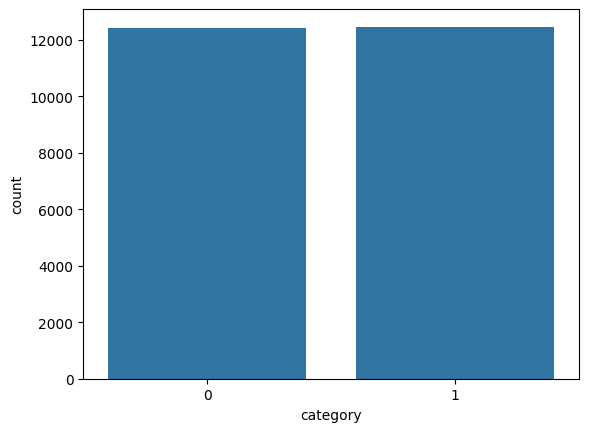

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

In [55]:
# frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

category
1    50.08
0    49.92
Name: proportion, dtype: float64

In [56]:
df.shape

(24904, 2)

### There are two category. 0 for negative and 1 for positive

In [57]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [58]:
df.sample(5)

,clean_comment,category,word_count
243,being an otaku since the days of robotech i ca...,1,245
24851,this is one of those movies that you and a bun...,0,198
12226,frank sinatra plays a nogoodnik exsoldier and ...,0,158
1151,well eyeboy i must say that it pleases me to n...,0,181
20360,whats inexplicable firstly the hatred towards ...,1,427


In [59]:
df['word_count'].describe()

count    24904.000000
mean       228.034492
std        169.592618
min         10.000000
25%        124.000000
50%        170.000000
75%        277.000000
max       2441.000000
Name: word_count, dtype: float64

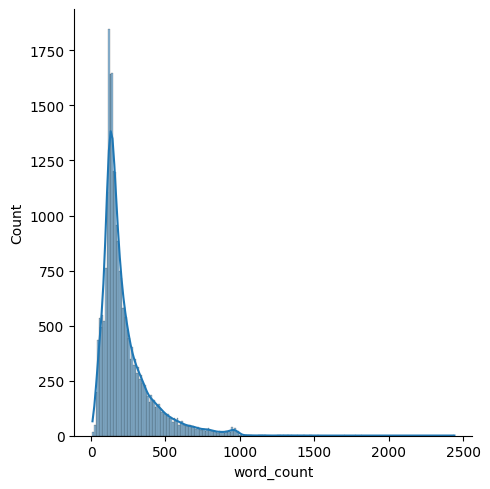

In [60]:
sns.displot(df['word_count'], kde=True)

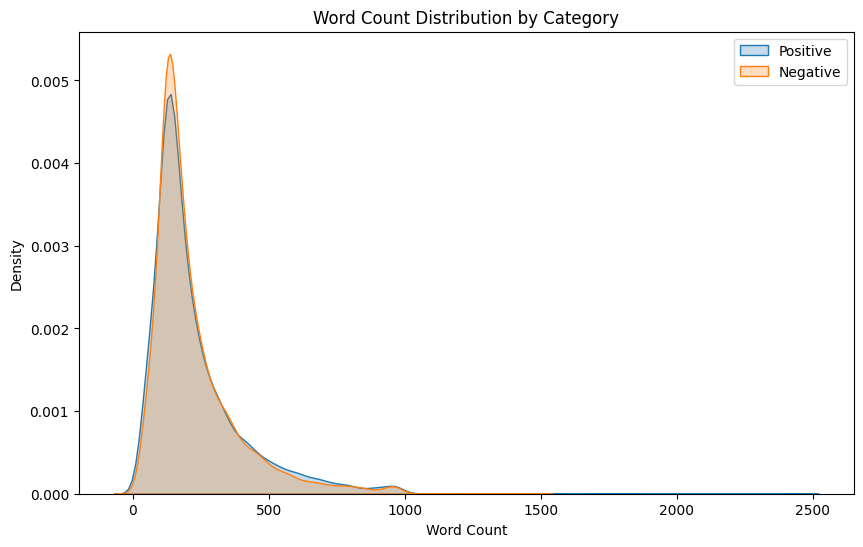

In [63]:
# Create a new figure with size 10x6 inches
plt.figure(figsize=(10, 6))

# Plot KDE for word_count where category is 1 (Positive), fill area under the curve and label it
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for word_count where category is 0 (Negative), fill area under the curve and label it
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Negative', fill=True)

# Add a title to the plot
plt.title('Word Count Distribution by Category')

# Label the x-axis as 'Word Count'
plt.xlabel('Word Count')

# Label the y-axis as 'Density'
plt.ylabel('Density')

# Add a legend to distinguish the categories
plt.legend()

# Display the plot
plt.show()

* Positive comments (category 1): Approximately 50.08% of the total, these comments tend to have a relatively smaller spread in word count, meaning     positive comments are generally shorter than negative ones.
* Negative comments (category 0): Approximately 49.92% of the total, these comments show a wider spread in word count, indicating that negative comments are generally longer compared to positive comments

<Axes: ylabel='word_count'>

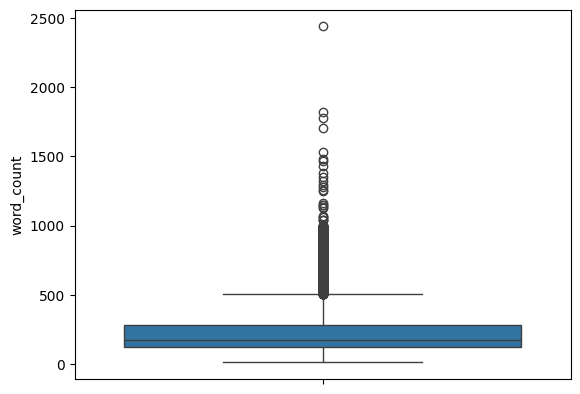

In [64]:
sns.boxplot(df['word_count'])

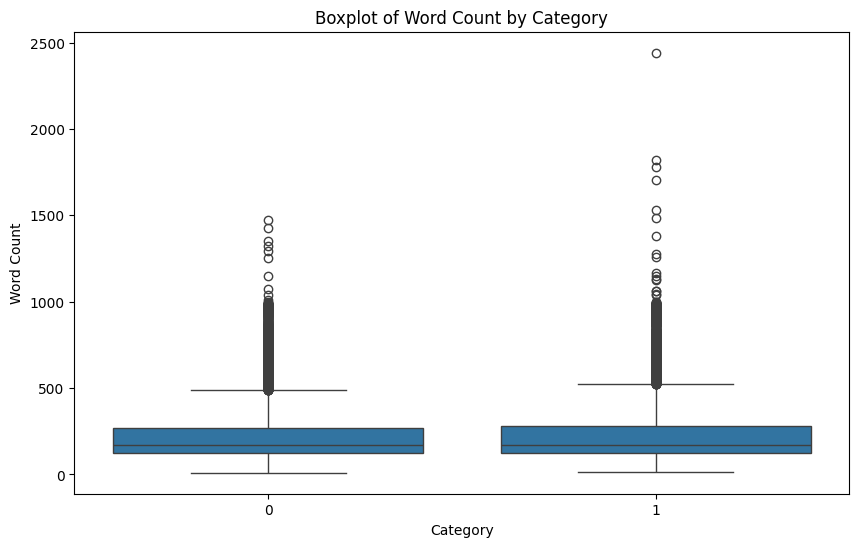

In [65]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

* Positive comments (category 1): The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.
* Negative comments (category -1): The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

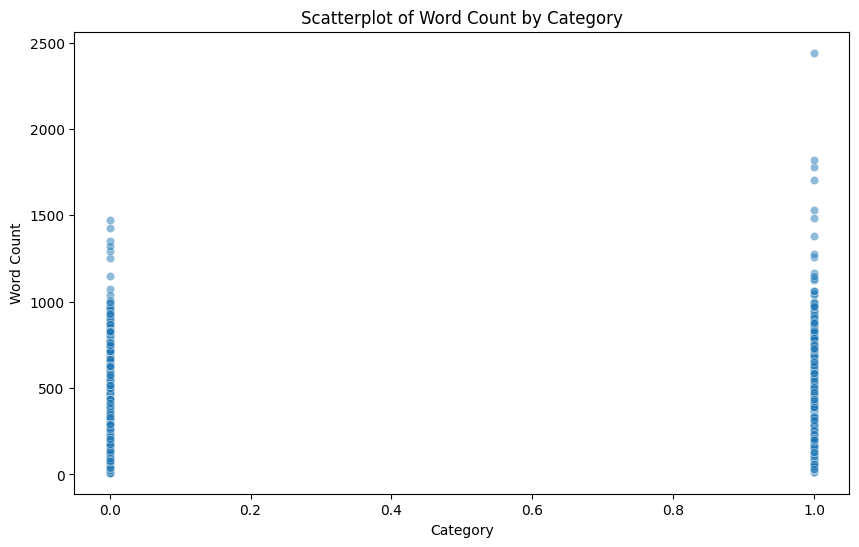

In [67]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

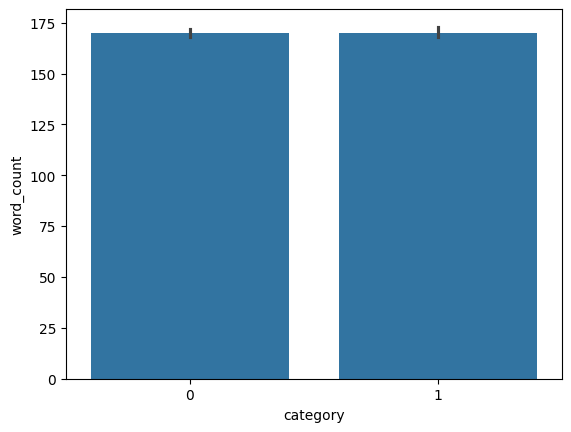

In [68]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

## Remove stopwords (using NLTK) 

In [69]:
from nltk.corpus import stopwords

In [70]:
# Download NLTK stopwords 
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\latif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
7923,this is one of those unfortunate films that su...,1,136,61
14743,really no reason to examine this much further ...,0,387,218
22885,besides being boring the scenes were oppressiv...,0,47,24
12917,i have no clue as to what this was shot on but...,0,58,29
6833,i first saw the film when it landed on us cabl...,1,209,109


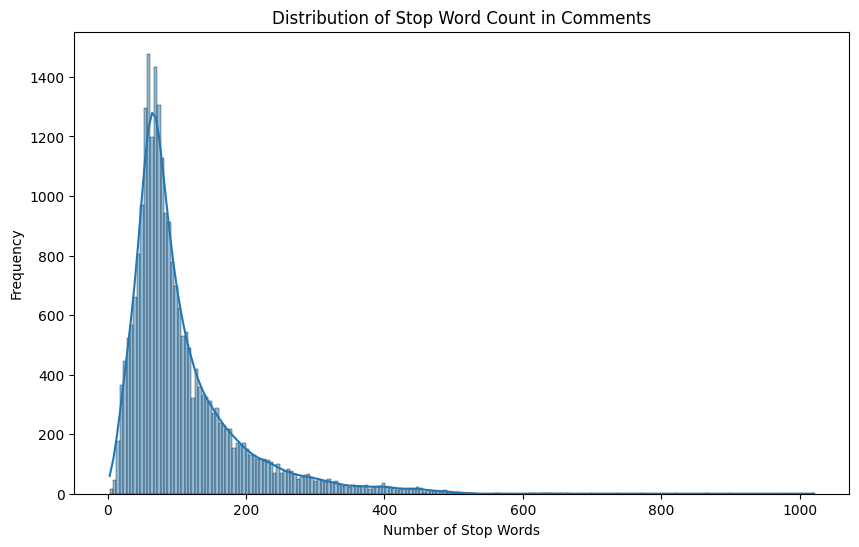

In [72]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

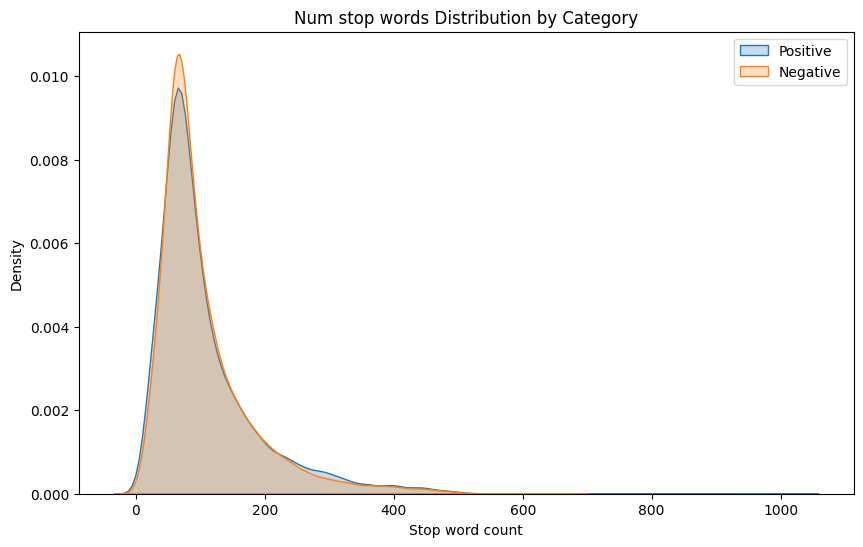

In [73]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

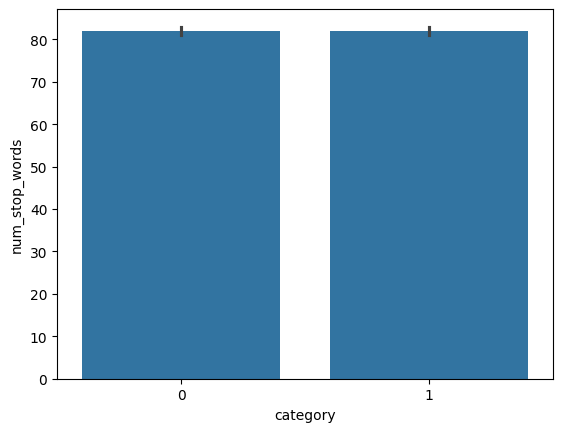

In [74]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')

C:\Users\latif\AppData\Local\Temp\ipykernel_28316\87103404.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


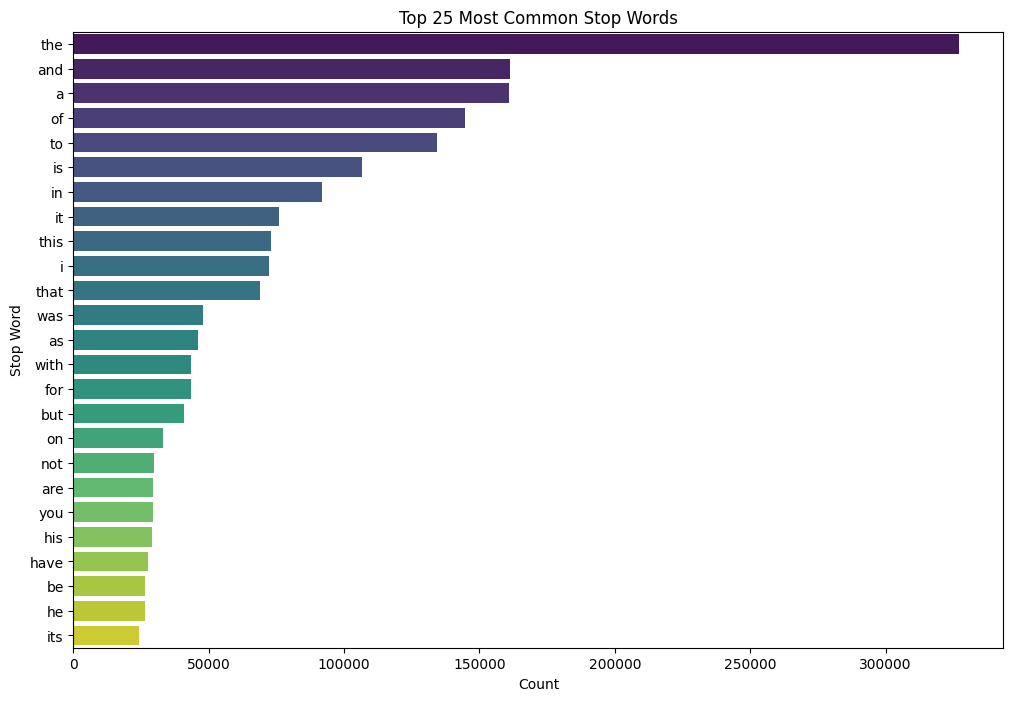

In [75]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [76]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,this film is absolutely awful but nevertheless...,0,267,117,1550
1,well since seeing parts through i can honest...,0,142,78,681
2,i got to see this film at a preview and was da...,1,195,89,1041
3,this adaptation positively butchers a classic ...,0,149,77,830
4,råzone is an awful movie it is so simple it se...,0,192,100,974


In [77]:
df['num_chars'].describe()

count    24904.000000
mean      1257.467475
std        953.363126
min         51.000000
25%        669.000000
50%        929.000000
75%       1530.000000
max      13271.000000
Name: num_chars, dtype: float64

In [78]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [79]:
char_frequency_df['character'].values

array([' ', 'e', 't', 'a', 'i', 'o', 's', 'n', 'r', 'h', 'l', 'd', 'c',
       'm', 'u', 'f', 'g', 'y', 'w', 'p', 'b', 'v', 'k', 'j', 'x', 'z',
       'q', 'é', '\x96', '\x97', '´', '’', 'è', 'á', '–', '\x91', '£',
       'ä', 'í', '¨', 'ô', 'ü', 'ó', 'ö', 'ç', 'à', '¡', 'ñ', 'ï', 'â',
       '“', 'ë', '”', 'ã', 'ê', 'å', '½', '»', 'ú', '\x84', '«', '\x8e',
       '\x9e', '\\', '¦', '·', '\x95', '§', 'ø', '\uf0b7', 'î', '‘', 'ù',
       '…', 'æ', 'ß', 'õ', '®', 'ý', 'û', '\x08', '¿', 'ò', 'ō', '₤', 'ì',
       '\x80', '\x9a', 'º', '³', '¢', '\x10', '¾', '¤', 'ð', '\x8d',
       '\xad', '°'], dtype=object)

In [80]:
char_frequency_df.tail(50)

,character,frequency
46,ï,34
76,â,31
59,“,29
64,ë,28
69,”,27
73,ã,26
45,ê,26
27,å,22
36,½,22
75,»,20


In [81]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
5523,when ever a film is produced or directed by me...,1,181,87,992,0
9631,there are similarities between ray lawrences j...,0,212,91,1275,0
20667,with part reconstruction and part direct shoot...,1,153,70,922,0
6417,this movie is bad i dont just mean bad as in o...,0,148,75,768,0
23250,ive been largely convinced to write this revie...,0,303,157,1547,0


In [82]:
df['num_punctuation_chars'].describe()

count    24904.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

C:\Users\latif\AppData\Local\Temp\ipykernel_28316\1012993805.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


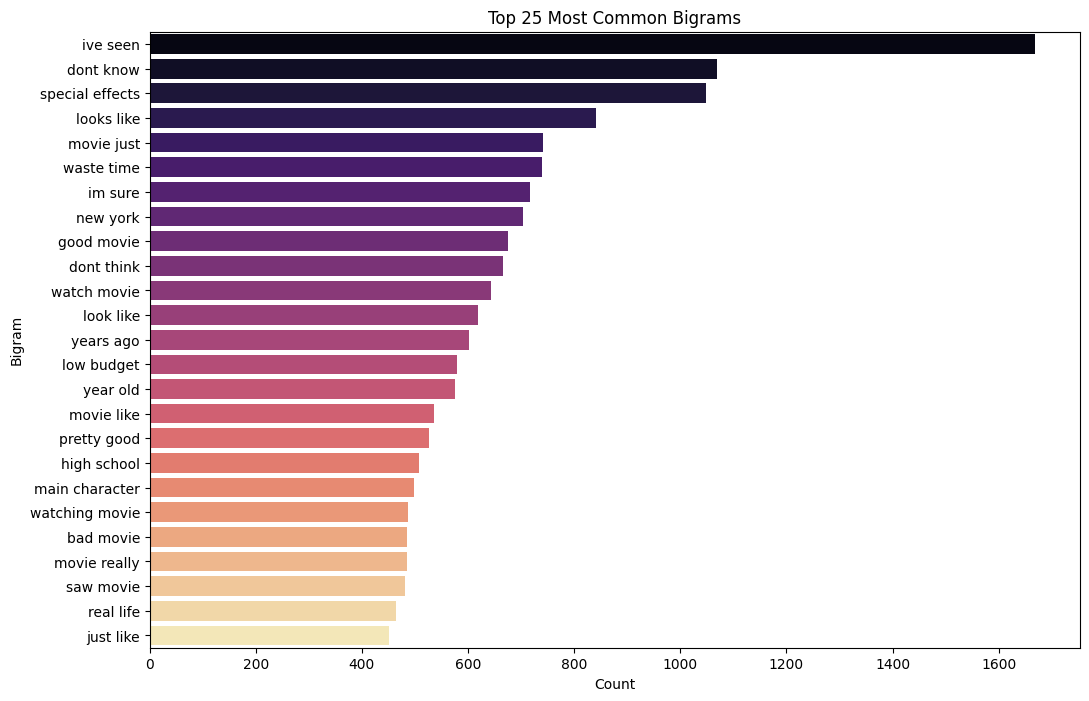

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

C:\Users\latif\AppData\Local\Temp\ipykernel_28316\2492861520.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


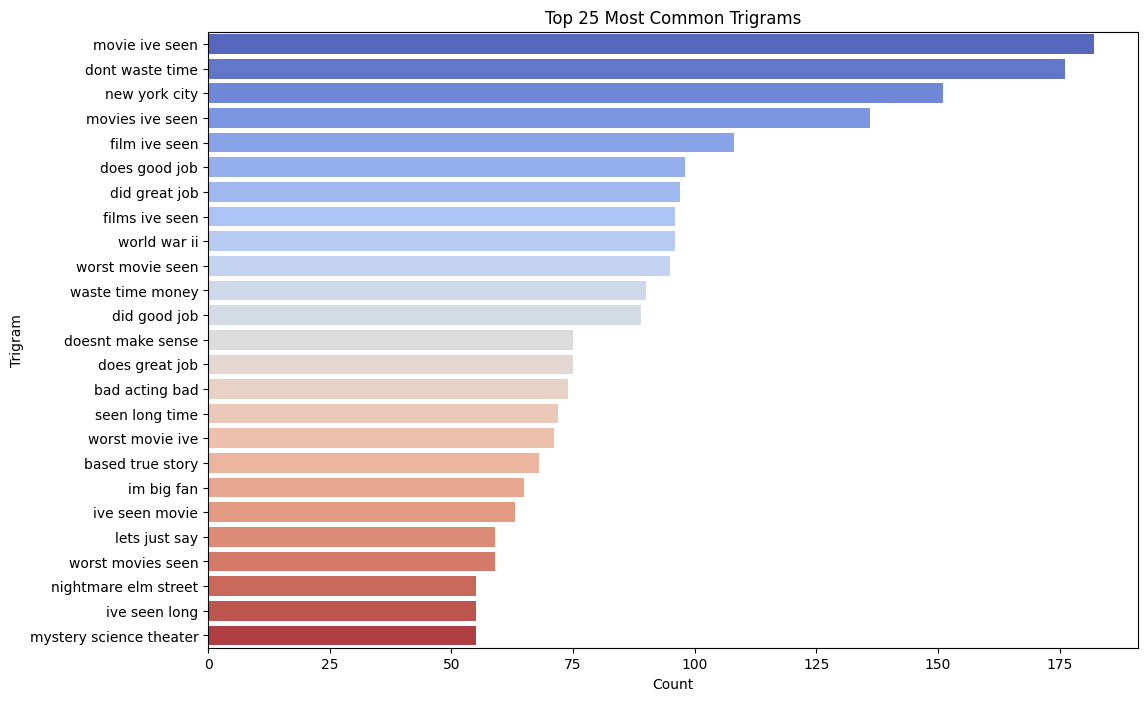

In [84]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [85]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [86]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
4,,5723291
12,e,3077349
0,t,2413596
8,a,2077008
2,i,1978338
10,o,1917097
3,s,1749517
15,n,1700975
17,r,1444924
1,h,1404673


In [87]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,this film is absolutely awful but nevertheless...,0,267,117,1550,0
1,well since seeing parts through i can honest...,0,142,78,681,0
2,i got to see this film at a preview and was da...,1,195,89,1041,0
3,this adaptation positively butchers a classic ...,0,149,77,830,0
4,rzone is an awful movie it is so simple it see...,0,192,100,974,0


In [88]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [89]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,film absolutely awful but nevertheless hilario...,0,267,117,1550,0
1,well since seeing parts honestly say never mad...,0,142,78,681,0
2,got see film preview dazzled not typical roman...,1,195,89,1041,0
3,adaptation positively butchers classic beloved...,0,149,77,830,0
4,rzone awful movie simple seems tried make movi...,0,192,100,974,0


In [90]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\latif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,film absolutely awful but nevertheless hilario...,0,267,117,1550,0
1,well since seeing part honestly say never made...,0,142,78,681,0
2,got see film preview dazzled not typical roman...,1,195,89,1041,0
3,adaptation positively butcher classic beloved ...,0,149,77,830,0
4,rzone awful movie simple seems tried make movi...,0,192,100,974,0


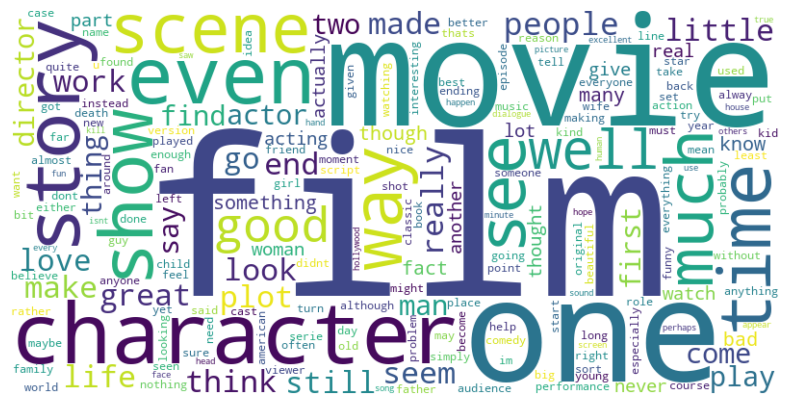

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

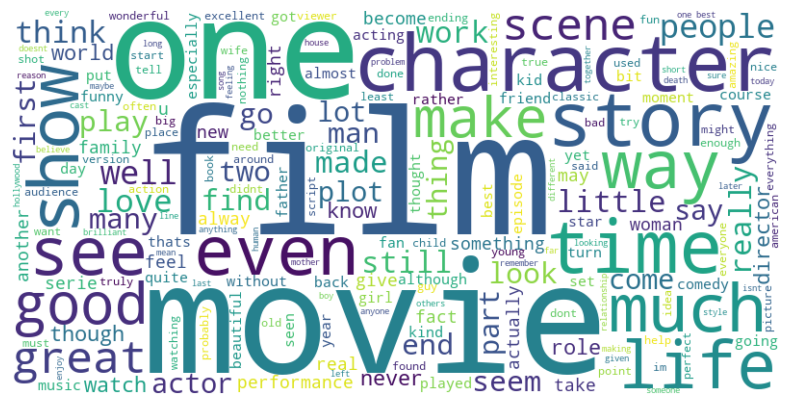

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

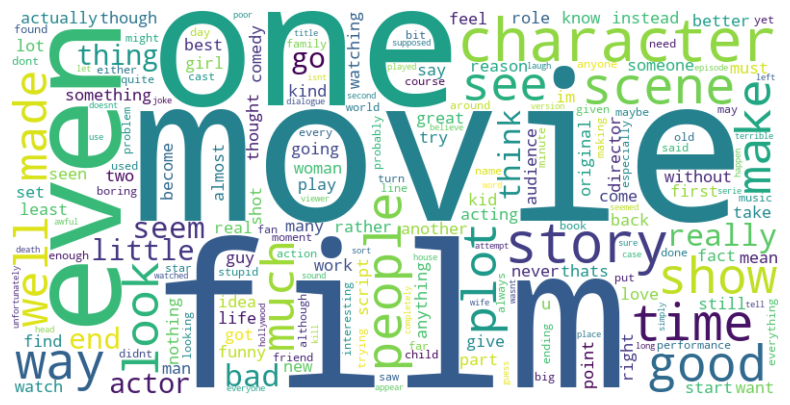

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

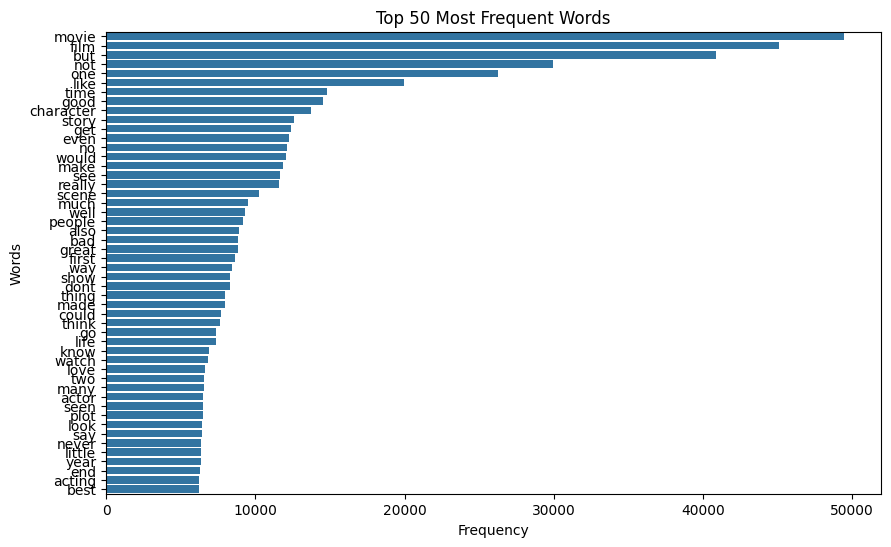

In [94]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

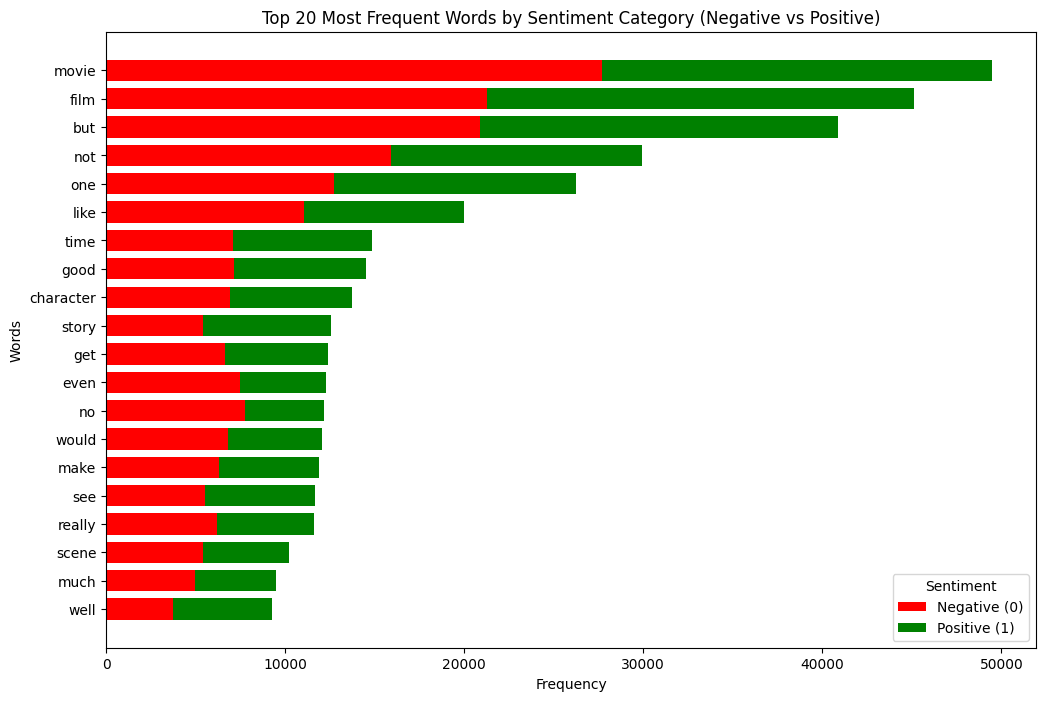

In [96]:
import matplotlib.pyplot as plt

def plot_top_n_words_two_categories(df, n=20, start=0):
    """
    Plot the top N most frequent words with stacked bars for two sentiment categories:
    0 for Negative and 1 for Positive.
    """
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']
        
        # Ignore categories other than 0 and 1
        if category not in [0, 1]:
            continue
        
        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {0: 0, 1: 0}  # Initialize counts
            
            word_category_counts[word][category] += 1

    # Calculate total counts per word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get top N words by total frequency
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare counts for plotting
    negative_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative counts first
    plt.barh(top_words, negative_counts, color='red', label='Negative (0)', height=bar_width)
    # Plot positive counts stacked on top of negative counts
    plt.barh(top_words, positive_counts, left=negative_counts, color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words by Sentiment Category (Negative vs Positive)')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Highest frequency at the top
    plt.show()

# Call the function with your DataFrame and desired number of words
plot_top_n_words_two_categories(df, n=20)

In [97]:
df.shape

(24904, 6)